In [26]:
%matplotlib inline

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os

import healpy as hp

from tqdm import tqdm

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)

In [28]:
import sys
sys.path.append('../')
import dirs

In [29]:
AS_CUT = True
cut_text = ""
if (AS_CUT):
    cut_text = "_AScut"

In [30]:
try:
    long_PL, lat_PL, mean_flux_PL = np.loadtxt(dirs.data_dir + 'Interaction_params_PL%s.txt'%(cut_text,), unpack=True, usecols=(1,2,6))
except FileNotFoundError as err:
    long_PL, lat_PL, mean_flux_PL = np.loadtxt(dirs.data_dir + 'Interaction_params_PL_short.txt', unpack=True, usecols=(1,2,6))
    
try:
    long_NFW, lat_NFW, mean_flux_NFW = np.loadtxt(dirs.data_dir + 'Interaction_params_NFW%s.txt'%(cut_text,), unpack=True, usecols=(1,2,6))
except FileNotFoundError as err:
    long_NFW, lat_NFW, mean_flux_NFW = np.loadtxt(dirs.data_dir + 'Interaction_params_NFW_short.txt', unpack=True, usecols=(1,2,6))

In [31]:
np.sqrt(0.68)

0.8246211251235321

In [32]:
long_PL_68 = np.quantile(np.abs(long_PL), np.sqrt(0.68))
lat_PL_68 = np.quantile(np.abs(lat_PL), np.sqrt(0.68))

long_NFW_68 = np.quantile(np.abs(long_NFW), np.sqrt(0.68))
lat_NFW_68 = np.quantile(np.abs(lat_NFW), np.sqrt(0.68))

In [33]:
print(long_PL_68, lat_PL_68)

9.930972987977153 4.413642203933655


In [34]:
theta_PL = (180/np.pi)*np.arccos(np.cos(long_PL*np.pi/180)*np.cos(lat_PL*np.pi/180))
theta_PL_68 = np.quantile(np.abs(theta_PL), 0.68)
print(theta_PL_68)

7.245727477138563


In [35]:
print(np.sum((np.abs(long_NFW) < long_NFW_68) & (np.abs(lat_NFW) < lat_NFW_68))/len(long_NFW))
print(np.sum((np.abs(long_PL) < long_PL_68) & (np.abs(lat_PL) < lat_PL_68))/len(long_PL))

0.703475
0.710864


In [36]:
cut_ang = 5
print(2.7*np.sum((np.abs(long_PL) < cut_ang) & (np.abs(lat_PL) < cut_ang) & (mean_flux_PL > 1e5))/len(long_PL)/(cut_ang**2))

4.0824e-05


In [37]:
cut_ang = 5
print(2.7*np.sum((np.abs(long_NFW) < cut_ang) & (np.abs(lat_NFW) < cut_ang) & (mean_flux_NFW > 1e5))/len(long_NFW)/(cut_ang**2))

3.240000000000001e-07


(array([1.39000e+02, 1.27000e+02, 1.31000e+02, 1.22000e+02, 1.37000e+02,
        1.51000e+02, 1.68000e+02, 1.65000e+02, 1.93000e+02, 1.76000e+02,
        1.92000e+02, 2.01000e+02, 2.12000e+02, 2.46000e+02, 2.68000e+02,
        3.40000e+02, 3.40000e+02, 3.76000e+02, 4.23000e+02, 4.53000e+02,
        5.07000e+02, 5.92000e+02, 5.93000e+02, 7.31000e+02, 7.57000e+02,
        8.95000e+02, 1.04300e+03, 1.07500e+03, 1.20300e+03, 1.34000e+03,
        1.50700e+03, 1.68000e+03, 1.81800e+03, 1.99000e+03, 2.29200e+03,
        2.46800e+03, 2.77700e+03, 3.16700e+03, 3.83400e+03, 4.45100e+03,
        5.83000e+03, 7.64300e+03, 1.06260e+04, 1.50720e+04, 2.14110e+04,
        3.18430e+04, 4.76260e+04, 6.93100e+04, 1.01985e+05, 1.50434e+05,
        1.49361e+05, 1.01716e+05, 6.94240e+04, 4.68020e+04, 3.20070e+04,
        2.14480e+04, 1.47610e+04, 1.06890e+04, 7.47800e+03, 5.75900e+03,
        4.46600e+03, 3.65900e+03, 3.15000e+03, 2.85500e+03, 2.54300e+03,
        2.26100e+03, 2.05800e+03, 1.83900e+03, 1.73

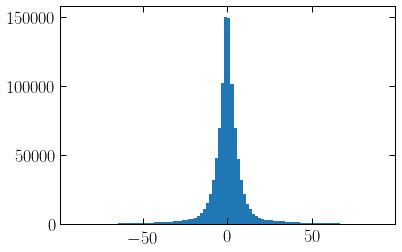

In [38]:
plt.figure()

plt.hist(long_PL, bins=100)

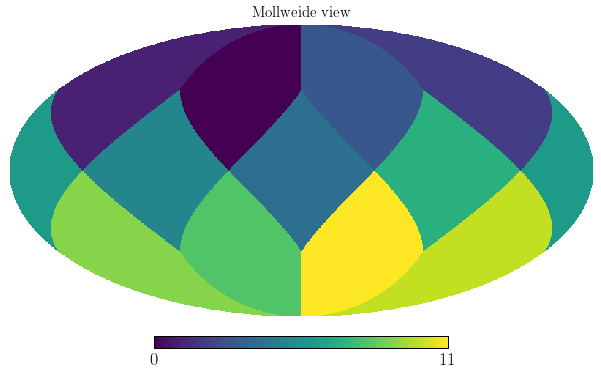

In [39]:
hp.mollview(np.arange(12))

In [40]:
N_side = 50

In [41]:
pix_PL = hp.pixelfunc.ang2pix(N_side, long_PL, lat_PL, nest=False, lonlat=True)
pix_NFW = hp.pixelfunc.ang2pix(N_side, long_NFW, lat_NFW, nest=False, lonlat=True)

In [42]:
npix = hp.pixelfunc.nside2npix(N_side)

In [43]:
counts_PL = np.zeros(npix)
counts_NFW = np.zeros(npix)
for i in tqdm(range(npix)):
    counts_PL[i] = np.count_nonzero(pix_PL == i)
    counts_NFW[i] = np.count_nonzero(pix_NFW == i)
    
counts_PL /= np.sum(counts_PL)
counts_NFW /= np.sum(counts_NFW)

100%|██████████| 30000/30000 [00:55<00:00, 544.32it/s]


<Figure size 432x288 with 0 Axes>

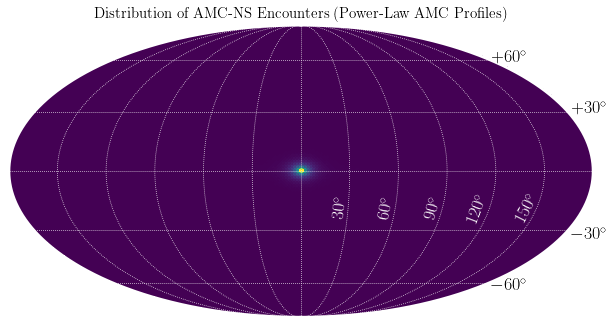

In [44]:
plt.figure()
#hp.mollview(np.log10((counts_PL + 1)/np.sum(counts_PL)), cbar=False)
hp.mollview((counts_PL + 1e-6)/np.sum(counts_PL), cbar=False)
#hp.graticule(30,color='white')

b_list = np.linspace(-90, 90,1000)



#68% values
Lon_max = long_PL_68
Lat_max = lat_PL_68

#hp.projplot(Lon_max + np.zeros(100),np.linspace(-Lat_max, Lat_max, 100), lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(-Lon_max + np.zeros(100),np.linspace(-Lat_max, Lat_max, 100), lonlat=True,color='w', linestyle='-.',lw=2)

#hp.projplot(np.linspace(-Lon_max, Lon_max, 100),-Lat_max + np.zeros(100), lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(np.linspace(-Lon_max, Lon_max, 100),Lat_max + np.zeros(100), lonlat=True,color='w', linestyle='-.',lw=2)

#hp.projplot(lon_list_PL,lat_list_PL, lonlat=True,color='w', linestyle='-.',lw=2)

for lat in np.arange(-180, 180, 30):
    hp.projplot(0.0*b_list + lat,b_list, lonlat=True,color='w', linestyle=':',lw=0.75)

    
hp.projplot(0.0*b_list + 180,b_list, lonlat=True, color='w',lw=3)
hp.projplot(0.0*b_list + 179.9,b_list, lonlat=True, color='w',lw=3)




#hp.projplot(0.0*b_list + 179.9,b_list, lonlat=True, color='w',lw=2)


plt.text(1.3, 0.75,r'$+60^\circ$')
plt.text(1.85, 0.4,r'$+30^\circ$')

plt.text(1.85, -0.45,r'$-30^\circ$')
plt.text(1.3, -0.8,r'$-60^\circ$')

#props = dict(facecolor='white', alpha=0.25, edgecolor='none', boxstyle="round,pad=0.25,rounding_size=0.5")
props=None

plt.text(0.2, -0.25, r'$30^\circ$', color='white', rotation=84, bbox=props, va='center')
plt.text(0.51, -0.25, r'$60^\circ$', color='white', rotation=79, bbox=props, va='center')
plt.text(0.83, -0.25, r'$90^\circ$', color='white', rotation=74, bbox=props, va='center')
plt.text(1.12, -0.25, r'$120^\circ$', color='white', rotation=69, bbox=props, va='center')
plt.text(1.45, -0.25, r'$150^\circ$', color='white', rotation=63, bbox=props, va='center')


l_list = np.linspace(-180, 180, 1000)

for lon in np.arange(-90, 90, 30):
    hp.projplot(l_list,0.0*l_list + lon, lonlat=True,color='w', linestyle=':', lw=0.75)
    
plt.title("Distribution of AMC-NS Encounters (Power-Law AMC Profiles)")

plt.savefig("../../plots/SkyMap_Moll_PL%s.pdf"%(cut_text,), bbox_inches="tight")
plt.show()

In [45]:
#Find threshold value:
#print(len(counts_NFW))
count_list = np.geomspace(1e-6, 1, 100)
for count in count_list:
    #print(np.sum(counts_NFW[counts_NFW > count]))
    if (np.sum(counts_NFW[counts_NFW > count]) < 0.68):
        contain68_NFW = count
        break
print(contain68_NFW)
print(np.sum(counts_NFW[counts_NFW > contain68_NFW]))

0.00026560877829466864
0.6706300000000001


In [46]:
#### Find curves to describe this region
#hp.ang2pix(N_side, lon, lat, lonlat=True)

lon_list = np.linspace(-180, 180, 180)
lat_list_bottom = 0.0*lon_list
lat_list_top = 0.0*lon_list
lat_range = np.linspace(0, 90, 180)
i0 = 0
for i, lon in enumerate(lon_list):
    #print(i)
    for lat in lat_range:
        ipix = hp.ang2pix(N_side, lon, lat, lonlat=True)
        if (counts_NFW[ipix] < contain68_NFW):
            lat_list_top[i] = lat
            if ((i0 == 0) and (lat != 0)):
                i0 = i
            #print(i0, i)
            break
            
for i, lon in enumerate(lon_list):
    #print(i)
    for lat in lat_range:
        ipix = hp.ang2pix(N_side, lon, -lat, lonlat=True)
        if (counts_NFW[ipix] < contain68_NFW):
            lat_list_bottom[i] = -lat
            #if ((i0 == 0) and (lat != 0)):
            #    i0 = i
            #print(i0, i)
            break

imax = np.where(lat_list_top > 0)[0][-1]
lon_list = lon_list[i0:imax]
lat_list_bottom = lat_list_bottom[i0:imax]
lat_list_top = lat_list_top[i0:imax]

#p = np.polyfit(lon_list, lat_list, 1)
#print(p)

lon_list_NFW = np.concatenate((lon_list, lon_list[::-1]))
lat_list_NFW = np.concatenate((lat_list_top, lat_list_bottom[::-1]))
#lat_line = np.polyval(p, lon_list)
#lat_list_NFW = np.concatenate((lat_line, -lat_line, -lat_line, lat_line))

<Figure size 432x288 with 0 Axes>

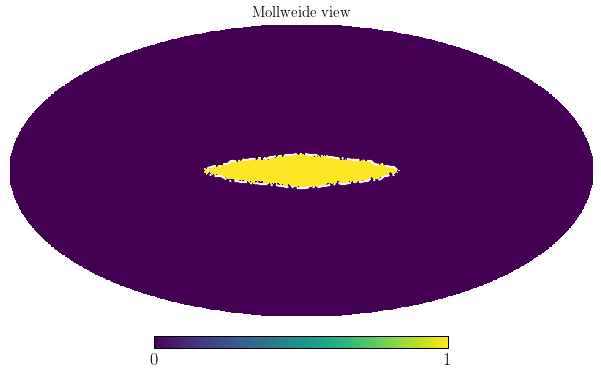

In [47]:
plt.figure()
hp.mollview(counts_NFW > contain68_NFW)
hp.projplot(lon_list_NFW,lat_list_NFW, lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(lon_list,lat_list_bottom, lonlat=True,color='w', linestyle='-.',lw=2)


<Figure size 432x360 with 0 Axes>

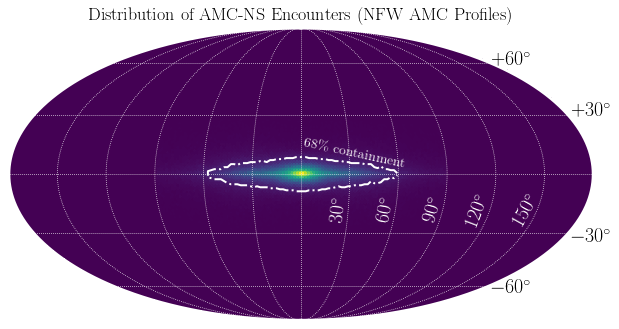

In [49]:
plt.figure(figsize=(6,5))
#hp.mollview(np.log10((counts_NFW+1)/np.sum(counts_NFW)), cbar=False)
hp.mollview((counts_NFW+1e-6)/np.sum(counts_NFW), cbar=False)#, cbar=True)
#hp.graticule(30,color='white')

b_list = np.linspace(-90, 90,1000)

#90% values
#Lon_max = 74
#Lat_max = 40

#68% values
#Lon_max = long_NFW_68
#Lat_max = lat_NFW_68


#hp.projplot(Lon_max + np.zeros(100),np.linspace(-Lat_max, Lat_max, 100), lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(-Lon_max + np.zeros(100),np.linspace(-Lat_max, Lat_max, 100), lonlat=True,color='w', linestyle='-.',lw=2)

#hp.projplot(np.linspace(-Lon_max, Lon_max, 100),-Lat_max + np.zeros(100), lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(np.linspace(-Lon_max, Lon_max, 100),Lat_max + np.zeros(100), lonlat=True,color='w', linestyle='-.',lw=2)

hp.projplot(lon_list_NFW,lat_list_NFW, lonlat=True,color='w', linestyle='-.',lw=2)

for lat in np.arange(-180, 180, 30):
    hp.projplot(0.0*b_list + lat,b_list, lonlat=True,color='w', linestyle=':',lw=0.75)

hp.projplot(0.0*b_list + 180,b_list, lonlat=True, color='w',lw=3)
hp.projplot(0.0*b_list + 179.9,b_list, lonlat=True, color='w',lw=3)

#hp.projplot(0.0*b_list + 179.9,b_list, lonlat=True, color='w',lw=2)

plt.text(1.3, 0.75,r'$+60^\circ$', fontsize=20)
plt.text(1.85, 0.4,r'$+30^\circ$', fontsize=20)

plt.text(1.85, -0.45,r'$-30^\circ$', fontsize=20)
plt.text(1.3, -0.8,r'$-60^\circ$', fontsize=20)

#props = dict(facecolor='white', alpha=0.25, edgecolor='none', boxstyle="round,pad=0.25,rounding_size=0.5")
props=None

plt.text(0.19, -0.25, r'$30^\circ$', color='white', rotation=84, bbox=props, va='center', fontsize=20)
plt.text(0.50, -0.25, r'$60^\circ$', color='white', rotation=79, bbox=props, va='center', fontsize=20)
plt.text(0.82, -0.25, r'$90^\circ$', color='white', rotation=74, bbox=props, va='center', fontsize=20)
plt.text(1.11, -0.25, r'$120^\circ$', color='white', rotation=69, bbox=props, va='center', fontsize=20)
plt.text(1.43, -0.25, r'$150^\circ$', color='white', rotation=61, bbox=props, va='center', fontsize=20)
#plt.text(-0.55, 0.20, r'$68\%$ containment', color='white', rotation=0, bbox=props, va='center', fontsize=16)

plt.text(0.01, 0.14, r'$68\%$ containment', color='white', rotation=-12, bbox=props, va='center', fontsize=14)

l_list = np.linspace(-180, 180, 1000)

for lon in np.arange(-90, 90, 30):
    hp.projplot(l_list,0.0*l_list + lon, lonlat=True,color='w', linestyle=':', lw=0.75)

plt.title("Distribution of AMC-NS Encounters (NFW AMC Profiles)", fontsize=18)


plt.savefig("../../plots/SkyMap_Moll_NFW%s.pdf"%(cut_text,), bbox_inches="tight")
plt.show()

In [25]:
longitude = np.linspace(-180, 180, N_side)
latitude = np.linspace(-90, 90, N_side)

ValueError: cannot reshape array of size 30000 into shape (50,50)

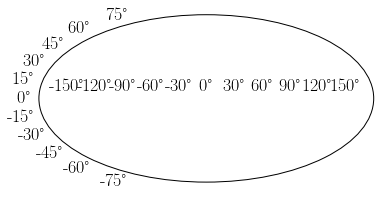

In [20]:
fig = plt.figure()
# matplotlib is doing the mollveide projection
ax = fig.add_subplot(111,projection='mollweide')

map_NFW = ((counts_NFW+1)/np.sum(counts_NFW)).reshape(N_side, N_side)

image = plt.pcolormesh(longitude[::-1], latitude, map_NFW)
